**ARIMA - TIME SERIES PRECTION**

I will be using the StastsModel Library for time series prediction 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from google.colab import drive 
import os 
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Mount Drive**

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [4]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Business Analytics/Arima')

#INCOME ACCOUNT#

In [5]:
df = pd.read_csv("Data/Income_Account.csv",index_col =0)
df.index.name=None
df.reset_index(inplace=True)
df.drop(df.index[248], inplace=False)
df.head(10)


,index,Value
0,1/1/1993,0.95
1,2/1/1993,1.19
2,3/1/1993,1.32
3,4/1/1993,1.64
4,5/1/1993,1.81
5,6/1/1993,1.92
6,7/1/1993,1.94
7,8/1/1993,1.94
8,9/1/1993,2.04
9,10/1/1993,1.75


In [6]:
start = datetime.datetime.strptime("1/1/1993", "%m/%d/%Y")
date_list = [start + relativedelta(months=x) for x in range(0,249)]
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None
df

,Value
1993-01-01,0.95
1993-02-01,1.19
1993-03-01,1.32
1993-04-01,1.64
1993-05-01,1.81
...,...
2013-05-01,31.34
2013-06-01,30.21
2013-07-01,42.37
2013-08-01,34.13


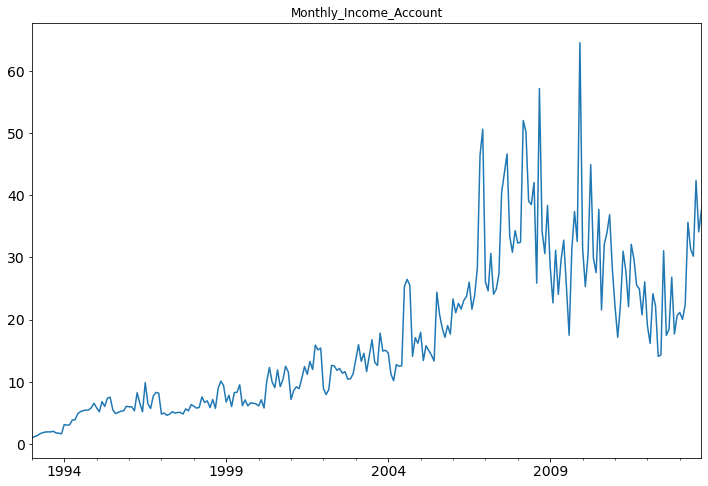

In [7]:
df.Value.plot(figsize=(12,8), title= 'Monthly_Income_Account', fontsize=14)
plt.savefig('monthly_Income_Account.png', bbox_inches='tight')

Now we are going to show the Observed Trend, Sesonal and Residual for the given data. For that purpose we do the following: 
1. Seasonal Decomposition 
2. Showing the Rolling Mean and Standrd Deviation 

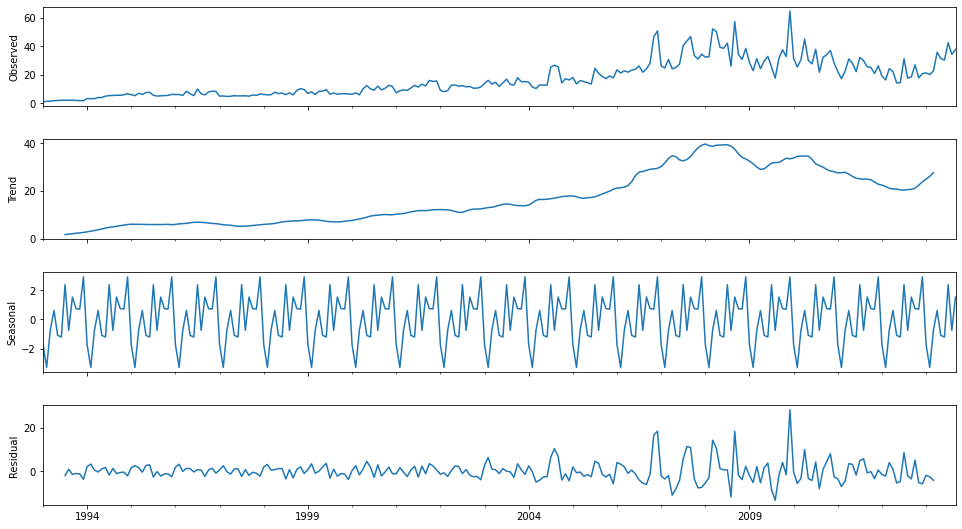

<Figure size 432x288 with 0 Axes>

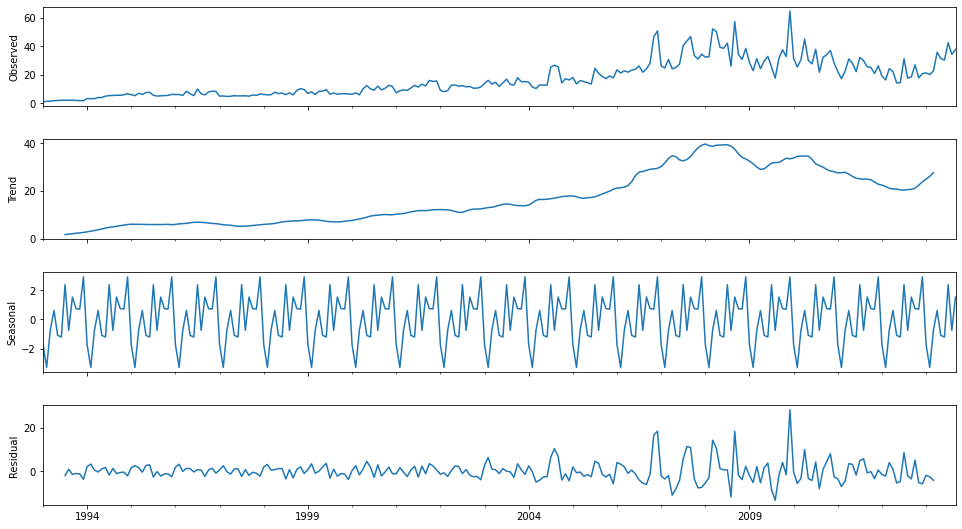

In [8]:
decomposition = seasonal_decompose(df.Value, freq=12) 
fig = plt.figure() 
fig = decomposition.plot() 
fig.set_size_inches(15, 8)
fig

**Performing the Adfuller test**
1. The augmented Dickey-Fuller test can be used to test for a unit root in an univariate process in the presence of serial correlation
2. Here I am calculating the Rolling mean / rolling average for the given data and even plotting it afterwards
3. Calculating the rolling STD for the data

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
 
 #Determing rolling statistics
 rolmean = timeseries.rolling(12).mean()
 rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
 fig = plt.figure(figsize=(12, 8))
 orig = plt.plot(timeseries, color='blue',label='Original')
 mean = plt.plot(rolmean, color='red', label='Rolling Mean')
 std = plt.plot(rolstd, color='black', label = 'Rolling Std')
 plt.legend(loc='best')
 plt.title('Rolling Mean & Standard Deviation')
 plt.show()
 
 #Perform Dickey-Fuller test:
 print('Results of Dickey-Fuller Test:')
 dftest = adfuller(timeseries, autolag='AIC')
 dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
 for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
 print (dfoutput)

**DICKEY FULLER TEST**
1. Shows us the test statistics, the p value and the crictical values at 5%, 10% and 1% respectively

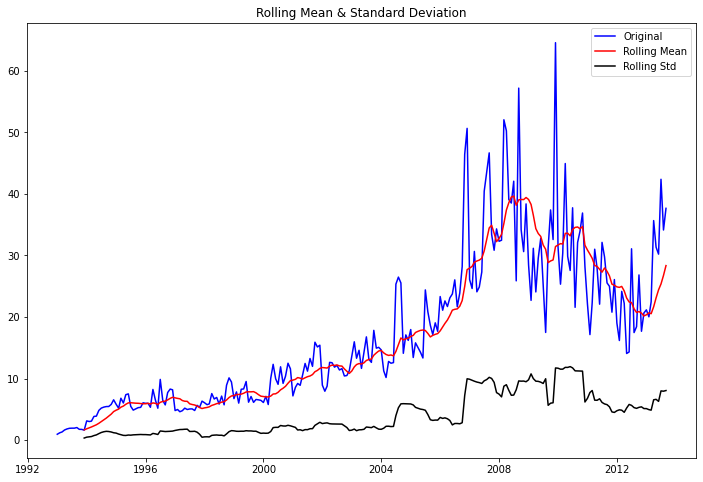

Results of Dickey-Fuller Test:
Test Statistic                  -0.907824
p-value                          0.785385
#Lags Used                      14.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64


In [10]:
test_stationarity(df.Value)

From the above we see the following : 
1. The original data and rolling mean always reamin together 
2. The Rolling STD we see the graph is quite stationary and the values reamin in a stable manar , they do not increase to much

**Applying Log for the Data**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


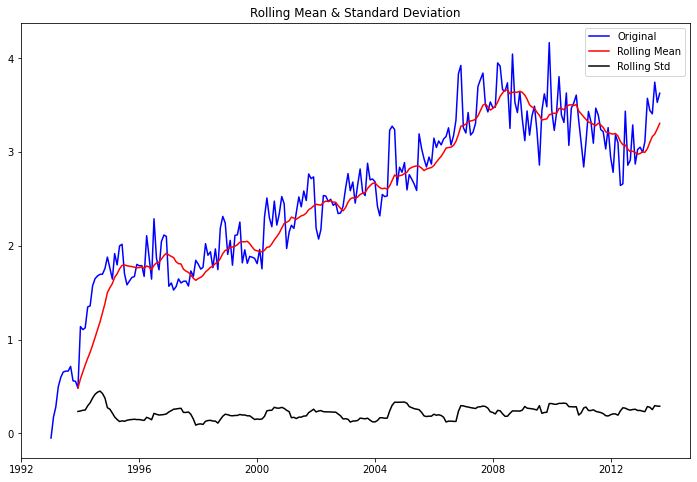

Results of Dickey-Fuller Test:
Test Statistic                  -2.013824
p-value                          0.280545
#Lags Used                      12.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [11]:
df.Value_log= df.Value.apply(lambda x: np.log(x)) 
test_stationarity(df.Value_log)

1. The original Data has more seasonal effect and it contains noise
2. Here the rolling mean starts at Zero and the graph is stationary throughout with little bumps here and there
3.  For the rolling STD whiles lies above the Rolling mean ,it tends to increase , but for the last few years the value tends to decrease.


**Showing the difference between the original Data and then shifting Data by 1**


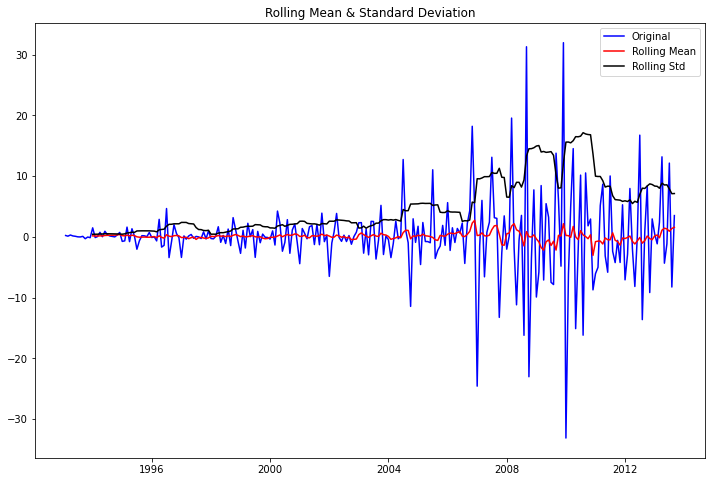

Results of Dickey-Fuller Test:
Test Statistic                  -4.813486
p-value                          0.000051
#Lags Used                      13.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64


In [12]:
df['first_difference'] = df.Value - df.Value.shift(1) 
test_stationarity(df.first_difference.dropna(inplace=False))

1. There is a sesonality on the original data givne in the graph.
2. The rolling STD starts at 0.2 for the year 1993.Thete is slight terend in the grpah for it.
3. For the case of rolling mean we see that it starts at around 0.1 and then it keeps on decreasing till 1997. After 1997 again it tends to increse. We see that a pattern has been built by seeing the graph.

**Applying Log First Differecne for the given data**

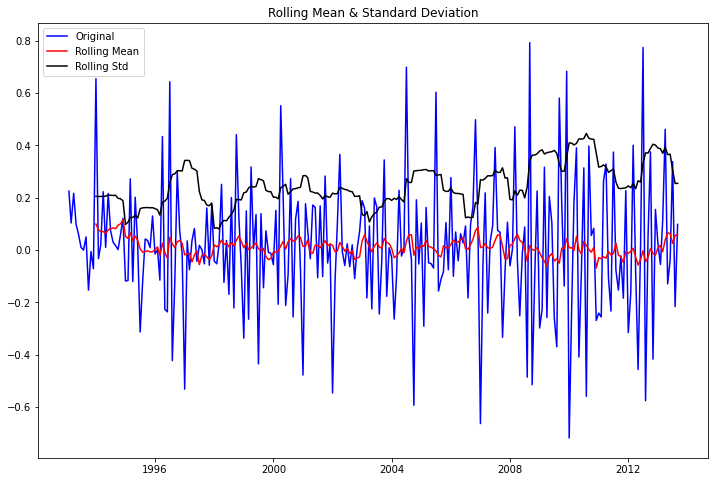

Results of Dickey-Fuller Test:
Test Statistic                  -4.582395
p-value                          0.000139
#Lags Used                      11.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [13]:
df['log_first_difference'] = df.Value_log - df.Value_log.shift(1) 
test_stationarity(df.log_first_difference.dropna(inplace=False))

1. The rolling STD starts at a value close to 0 and tends to keep on increase with slight bumps till 2011. After 2011 the value tends to decrease.
2. In the case of rolling mean we for the first few years from 1993 - 2003 the value remains almost stationary. After 2003 there quite big bumps where the value suddenly decrease and increase. 2011 onwards we see that value starts to increse only.

**Showing the Seasonal first difference**

The first seasonal difference is caluated as :
- First seasonal differcne is = first difference - first difference shift



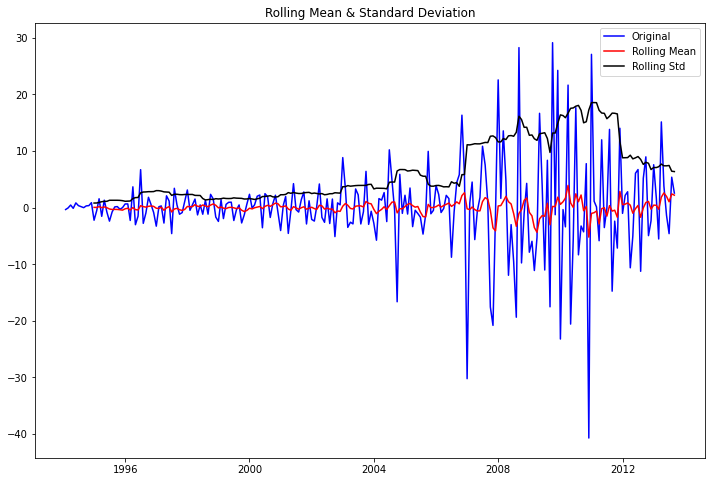

Results of Dickey-Fuller Test:
Test Statistic                -5.945448e+00
p-value                        2.209818e-07
#Lags Used                     1.400000e+01
Number of Observations Used    2.210000e+02
Critical Value (1%)           -3.460291e+00
Critical Value (5%)           -2.874709e+00
Critical Value (10%)          -2.573789e+00
dtype: float64


In [14]:
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12) 
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))


**Show the Results**
- Results are shown using the SARIMAX 
- We can see the AIC , BIC and Logliklihood for the goven data




In [15]:
mod = sm.tsa.statespace.SARIMAX(df.Value, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Value   No. Observations:                  249
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -770.158
Date:                            Wed, 20 Oct 2021   AIC                           1544.316
Time:                                    00:57:56   BIC                           1551.243
Sample:                                01-01-1993   HQIC                          1547.108
                                     - 09-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7620      0.031    -24.630      0.000      -0.823      -0.701
sigma2        38.2711      1.632   

**Plotting the Graph to show the next three months predicted Values**

In [16]:
start = datetime.datetime.strptime("2013-10-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,3)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future])

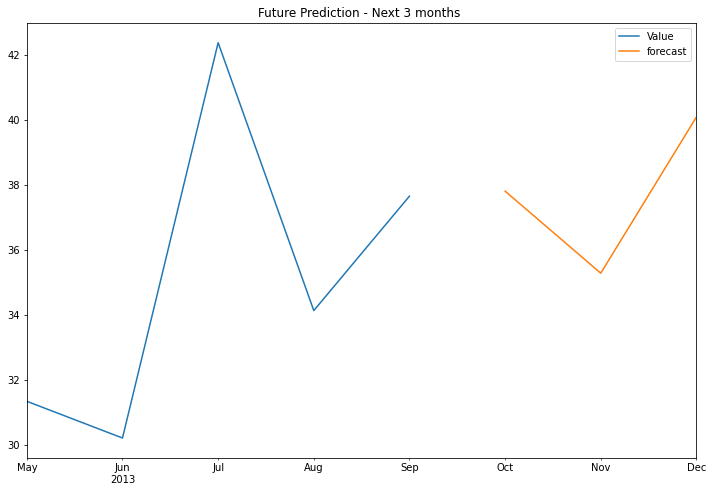

In [17]:
df['forecast'] = results.predict(start =249, end = 251, dynamic= True) 
df[['Value', 'forecast']].iloc[-8:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')
plt.title("Future Prediction - Next 3 months ")
plt.show()

**Show the Predicted Values**

In [18]:
df['forecast']

1993-01-01          NaN
1993-02-01          NaN
1993-03-01          NaN
1993-04-01          NaN
1993-05-01          NaN
                ...    
2013-08-01          NaN
2013-09-01          NaN
2013-10-01    37.803374
2013-11-01    35.280112
2013-12-01    40.083896
Name: forecast, Length: 252, dtype: float64

#EXPORTS ACCOUNT#

In [19]:
df_exports = pd.read_csv("Data/Exports Account.csv",index_col =0)
df_exports.index.name=None
df_exports.reset_index(inplace=True)
df_exports.drop(df_exports.index[248], inplace=False)
df_exports.head(10)


,index,Value
0,1/1/1993,8.55
1,2/1/1993,10.00
2,3/1/1993,8.82
3,4/1/1993,9.37
4,5/1/1993,10.21
5,6/1/1993,6.30
6,7/1/1993,6.32
7,8/1/1993,6.96
8,9/1/1993,10.31
9,10/1/1993,13.98


In [20]:
start = datetime.datetime.strptime("1/1/1993", "%m/%d/%Y")
date_list = [start + relativedelta(months=x) for x in range(0,249)]
df_exports['index'] =date_list
df_exports.set_index(['index'], inplace=True)
df.index.name=None
df_exports


,Value
index,
1993-01-01,8.55
1993-02-01,10.00
1993-03-01,8.82
1993-04-01,9.37
1993-05-01,10.21
...,...
2013-05-01,214.34
2013-06-01,194.77
2013-07-01,227.02


,Value
index,
1993-01-01,8.55
1993-02-01,10.00
1993-03-01,8.82
1993-04-01,9.37
1993-05-01,10.21
...,...
2013-05-01,214.34
2013-06-01,194.77
2013-07-01,227.02


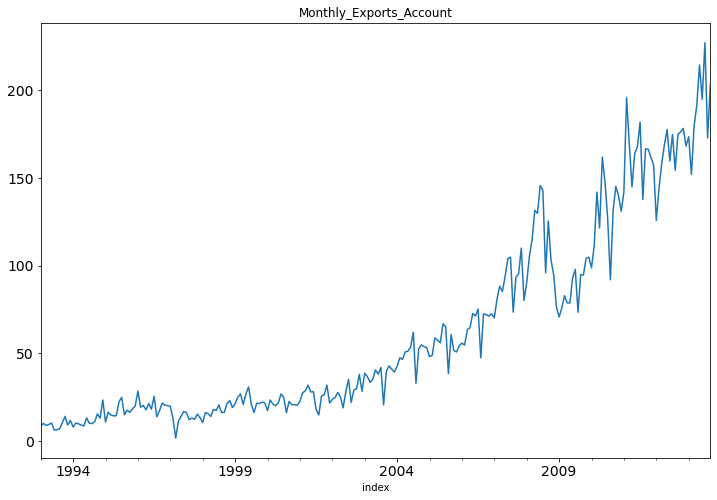

In [21]:
df_exports.Value.plot(figsize=(12,8), title= 'Monthly_Exports_Account', fontsize=14)
plt.savefig('monthly_Exports_Account.png', bbox_inches='tight')
df_exports


Now we are going to show the Observed Trend, Sesonal and Residual for the given data. For that purpose we do the following:

1. Seasonal Decomposition
2. Showing the Rolling Mean and Standrd Deviation

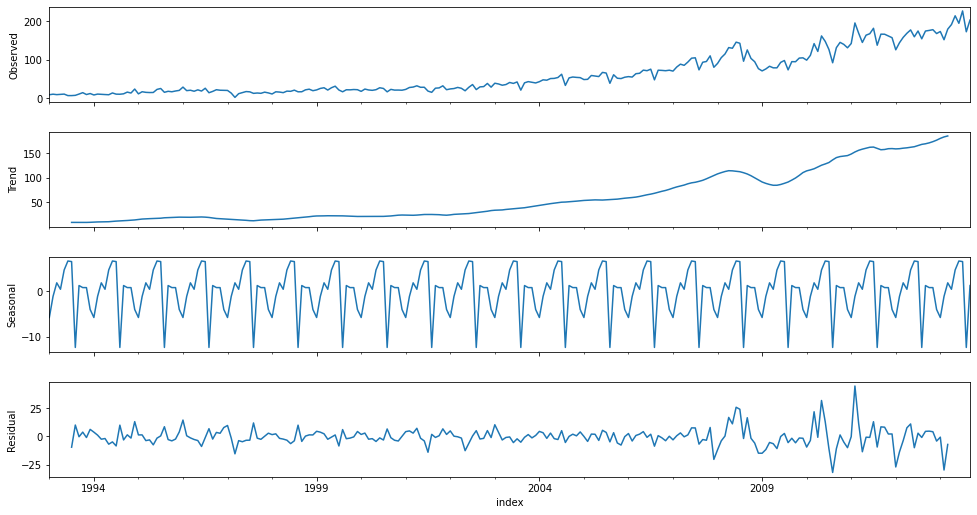

<Figure size 432x288 with 0 Axes>

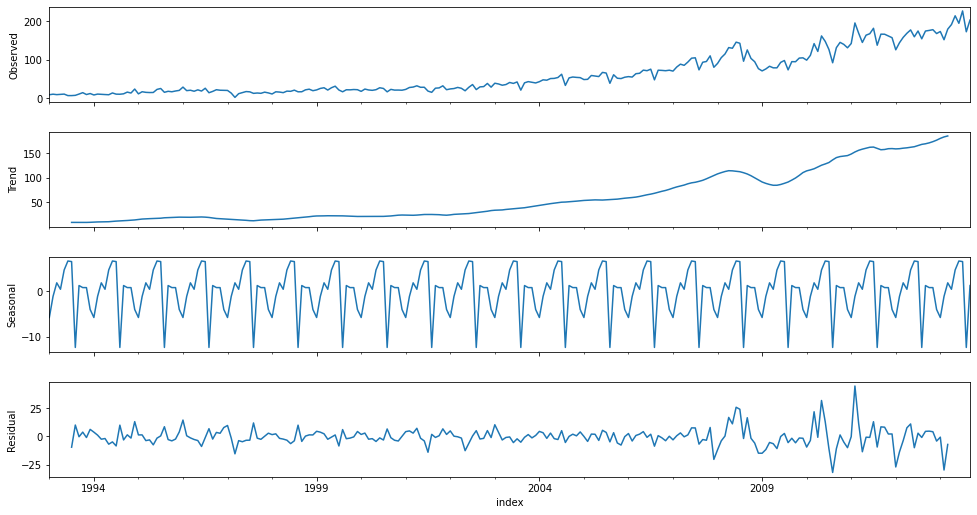

In [22]:
decomposition = seasonal_decompose(df_exports.Value, freq=12) 
fig = plt.figure() 
fig = decomposition.plot() 
fig.set_size_inches(15, 8)
fig


**Performing the Adfuller test**
1. The augmented Dickey-Fuller test can be used to test for a unit root in an univariate process in the presence of serial correlation
2. Here I am calculating the Rolling mean / rolling average for the given data and even plotting it afterwards
3. Calculating the rolling STD for the data

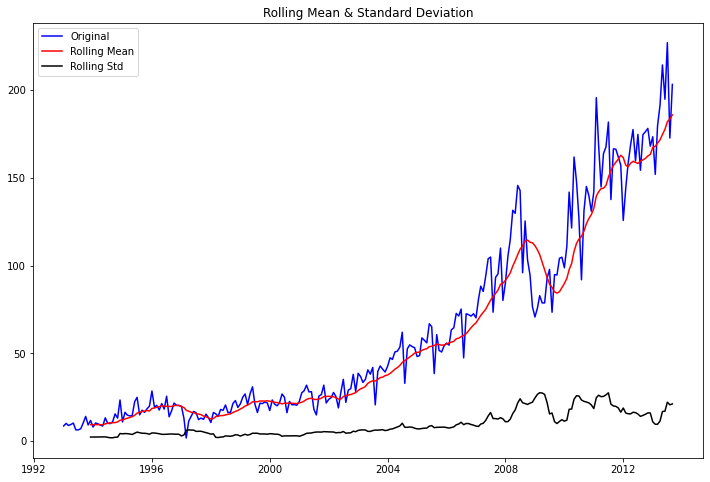

Results of Dickey-Fuller Test:
Test Statistic                   1.297540
p-value                          0.996595
#Lags Used                      12.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [23]:
test_stationarity(df_exports.Value)

From the above we see the following : 
1. We see that the rolling mean graph is trending in the values for the data.
2. In the case of rolling STD we see for the first few years there is a trend, after that is a sesonality for the given grpah and the data.
3. Also the value of rolling mean is much higher than that of rolling STD.

**Applying Log for the Data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


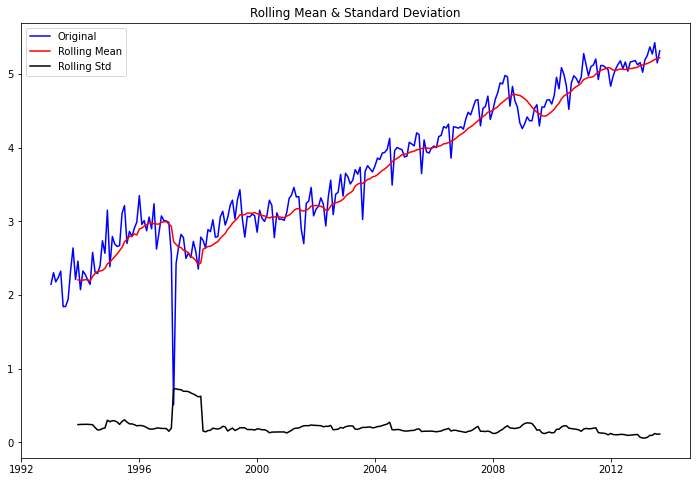

Results of Dickey-Fuller Test:
Test Statistic                  -0.569335
p-value                          0.877762
#Lags Used                      13.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64


In [24]:
df_exports.Value_log= df_exports.Value.apply(lambda x: np.log(x)) 
test_stationarity(df_exports.Value_log)

From the above graph we see the following: 
1. Rolling mean and the original tend to increase as the numbers of years tends tto move forward. 
2. Rolling STD only has a slight increase between 11997 and 1998 , but for all the other years it tends to remain stable

**Showing the difference between the original Data and then shifting Data by 1**

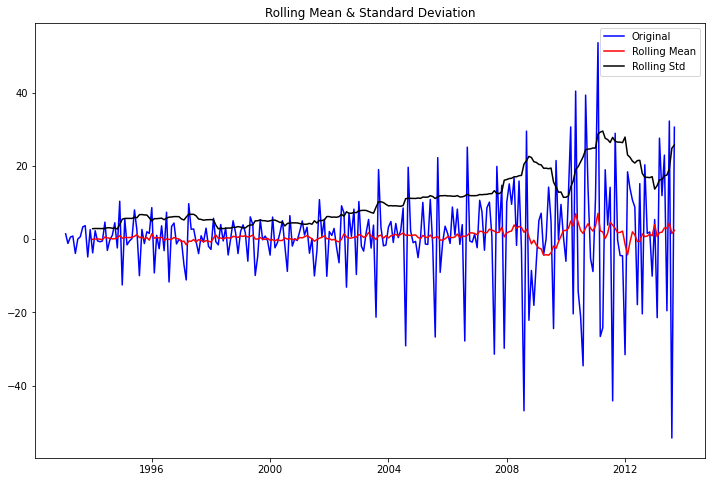

Results of Dickey-Fuller Test:
Test Statistic                  -4.547227
p-value                          0.000161
#Lags Used                      16.000000
Number of Observations Used    231.000000
Critical Value (1%)             -3.458980
Critical Value (5%)             -2.874135
Critical Value (10%)            -2.573482
dtype: float64


In [25]:
df_exports['first_difference'] = df_exports.Value - df_exports.Value.shift(1) 
test_stationarity(df_exports.first_difference.dropna(inplace=False))

1. We see in the Graph that the original data and the rolling mean amd rolling STD are together.
2. The roginal graph is seasonality
3. The rolling Mean graph is staionary for the years till 2007, after which the value then tends to decrese and increse a constalntly
4. In the case of rolling STD the value starts at around 0 and then tends to increse till year 2009, after which we see that there are some bumps where value tends to decrese and again increse

**Showing the Seasonal First Difference**


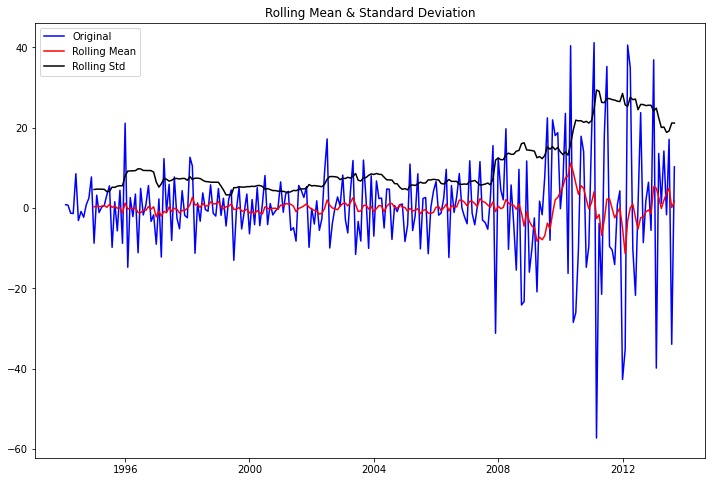

Results of Dickey-Fuller Test:
Test Statistic                -7.164445e+00
p-value                        2.910964e-10
#Lags Used                     1.200000e+01
Number of Observations Used    2.230000e+02
Critical Value (1%)           -3.460019e+00
Critical Value (5%)           -2.874590e+00
Critical Value (10%)          -2.573725e+00
dtype: float64


In [26]:
df_exports['seasonal_first_difference'] = df_exports.first_difference - df_exports.first_difference.shift(12) 
test_stationarity(df_exports.seasonal_first_difference.dropna(inplace=False))

In [27]:
mod = sm.tsa.statespace.SARIMAX(df_exports.Value, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Value   No. Observations:                  249
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                -890.297
Date:                            Wed, 20 Oct 2021   AIC                           1784.593
Time:                                    00:58:00   BIC                           1791.521
Sample:                                01-01-1993   HQIC                          1787.386
                                     - 09-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7037      0.040    -17.764      0.000      -0.781      -0.626
sigma2       106.9397      5.913   

**Plotting the Graph and Showing Next 3 months Prediction Values**

In [28]:
start = datetime.datetime.strptime("2013-10-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,3)]
future = pd.DataFrame(index=date_list, columns= df_exports.columns)
df_exports = pd.concat([df_exports, future])


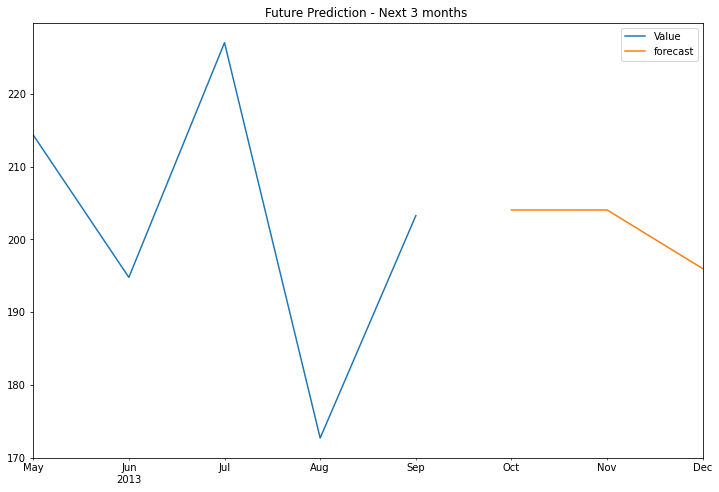

In [29]:
df_exports['forecast'] = results.predict(start =249, end = 251, dynamic= True) 
df_exports[['Value', 'forecast']].iloc[-8:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')
plt.title("Future Prediction - Next 3 months ")
plt.show()


**Showing the Predicted Values**

In [30]:
df_exports['forecast']

1993-01-01           NaN
1993-02-01           NaN
1993-03-01           NaN
1993-04-01           NaN
1993-05-01           NaN
                 ...    
2013-08-01           NaN
2013-09-01           NaN
2013-10-01    204.028188
2013-11-01    204.029662
2013-12-01    195.965245
Name: forecast, Length: 252, dtype: float64

#Loan Interest Rate#

In [31]:
path = "Data"
df_loan = pd.read_csv(path+"/Interest_Rates.csv",index_col =0)
df_loan.index.name=None
df_loan.reset_index(inplace=True)
df_loan.drop(df_loan.index[19], inplace=False)
df_loan.head(10)


,index,Value
0,12/1/2015,7.08
1,1/1/2016,6.32
2,2/1/2016,4.70
3,3/1/2016,5.56
4,4/1/2016,6.05
5,5/1/2016,4.80
6,6/1/2016,5.02
7,7/1/2016,5.09
8,8/1/2016,5.38
9,9/1/2016,5.00


In [32]:
start = datetime.datetime.strptime("12/1/2015", "%m/%d/%Y")
date_list = [start + relativedelta(months=x) for x in range(0,20)]
df_loan['index'] =date_list
df_loan.set_index(['index'], inplace=True)
df_loan.index.name=None
df_loan

,Value
2015-12-01,7.08
2016-01-01,6.32
2016-02-01,4.70
2016-03-01,5.56
2016-04-01,6.05
2016-05-01,4.80
2016-06-01,5.02
2016-07-01,5.09
2016-08-01,5.38
2016-09-01,5.00


,Value
2015-12-01,7.08
2016-01-01,6.32
2016-02-01,4.70
2016-03-01,5.56
2016-04-01,6.05
2016-05-01,4.80
2016-06-01,5.02
2016-07-01,5.09
2016-08-01,5.38
2016-09-01,5.00


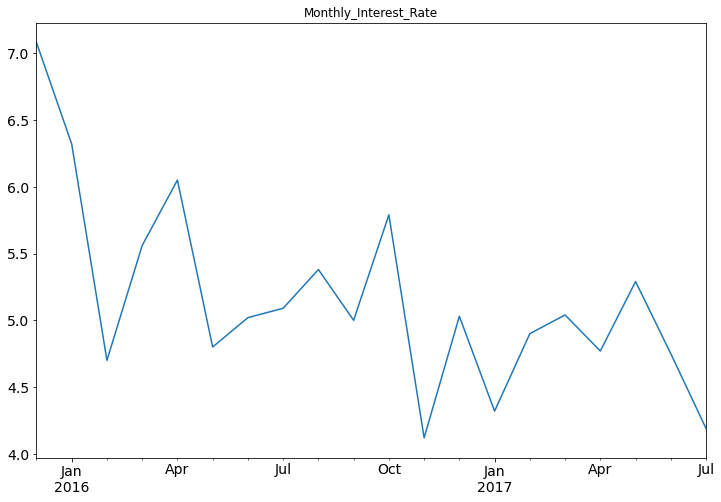

In [33]:
df_loan.Value.plot(figsize=(12,8), title= 'Monthly_Interest_Rate', fontsize=14)
plt.savefig('monthly_Interest_Rate.png', bbox_inches='tight')
df_loan


Now we are going to show the Observed Trend, Sesonal and Residual for the given data. For that purpose we do the following:

1. Seasonal Decomposition
2. Showing the Rolling Mean and Standrd Deviation

<Figure size 432x288 with 0 Axes>

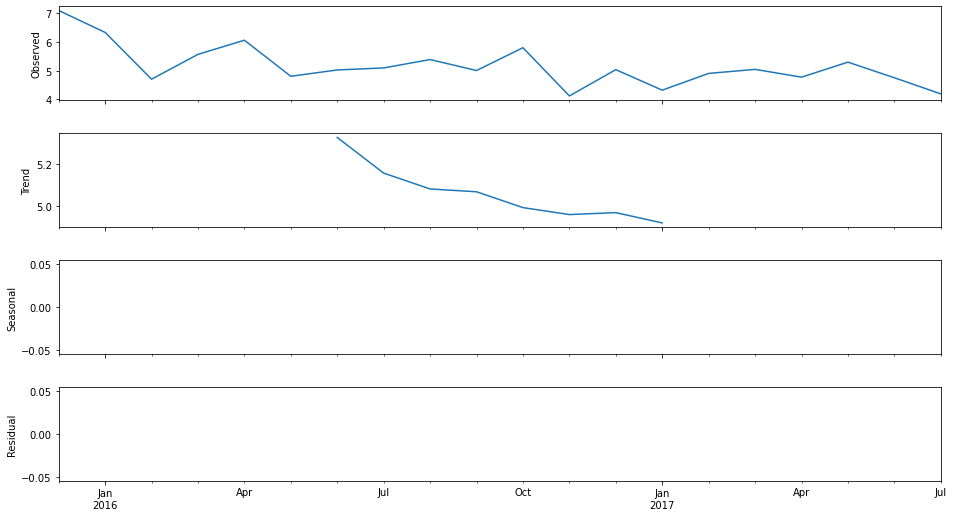

In [34]:
decomposition = seasonal_decompose(df_loan.Value, freq=12) 
fig = plt.figure() 
fig = decomposition.plot() 
fig.set_size_inches(15, 8)


From the above graphs I can see the following: 
1. There is only a trend present for the data

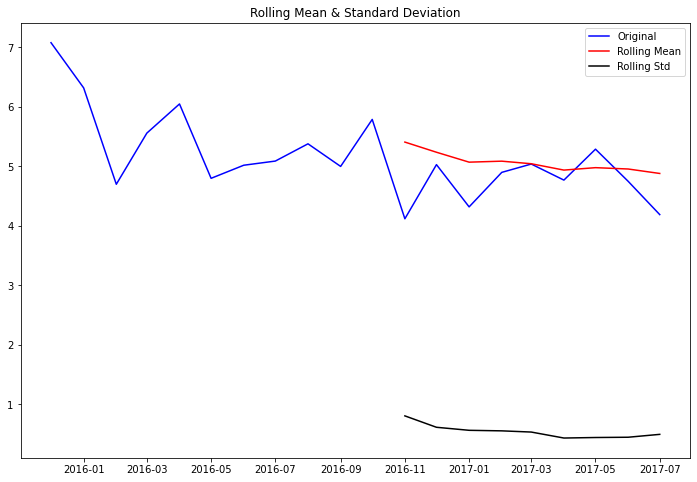

Results of Dickey-Fuller Test:
Test Statistic                 -1.405768
p-value                         0.579508
#Lags Used                      5.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [35]:
test_stationarity(df_loan.Value)


From the above we see the following: 
1. We see in the Graph that the original data and the rolling mean are always together.
2. For the rolling STD we that value is quite low compared with the rolling mean. It is due to the data is not that quite large just a few rows are there for its calculation.
3. There is a trend that has been developed in the orginal data.

**Applying Log for the Data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


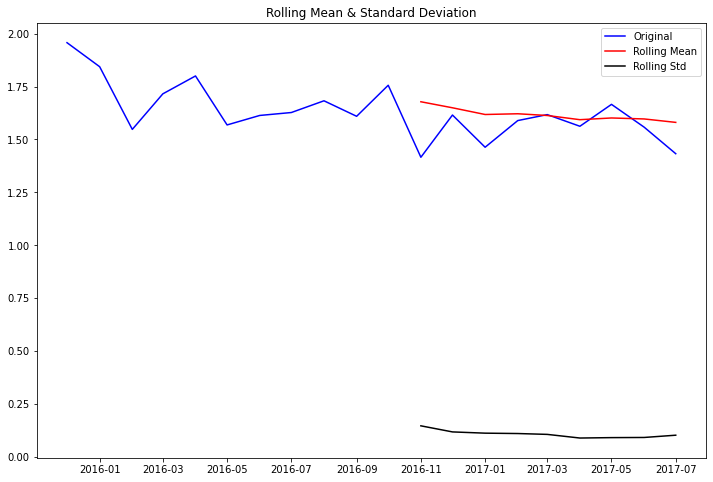

Results of Dickey-Fuller Test:
Test Statistic                 -1.349306
p-value                         0.606324
#Lags Used                      5.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [36]:
df_loan.Value_log= df_loan.Value.apply(lambda x: np.log(x)) 
test_stationarity(df_loan.Value_log)

From the above we see the following: 
1. The origonal data it more trendy and we can see trend in it.
2. The rolling mean has a trend in thr data, it increase for some years and then decrease.
3. the rolling STD graph is also a trend scenario here the value tends to decrease.
4. The value of rolling mean is less compared to that of rolling STD.

**Showing the difference between the original Data and then shifting Data by 1**

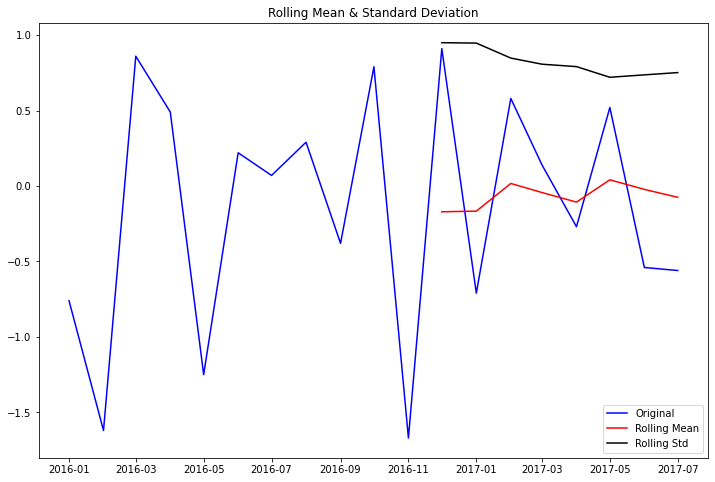

Results of Dickey-Fuller Test:
Test Statistic                 -2.267799
p-value                         0.182564
#Lags Used                      4.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [37]:
df_loan['first_difference'] = df_loan.Value - df_loan.Value.shift(1) 
test_stationarity(df_loan.first_difference.dropna(inplace=False))

From the above we see the following: 
1. we can see the rolling mean and the STD only from 2017 -06 2017 -07 month.
2. we see that rolling STD value stationary and the rolling mean value is a downward slope.


**Showing the Seasonal First Difference**

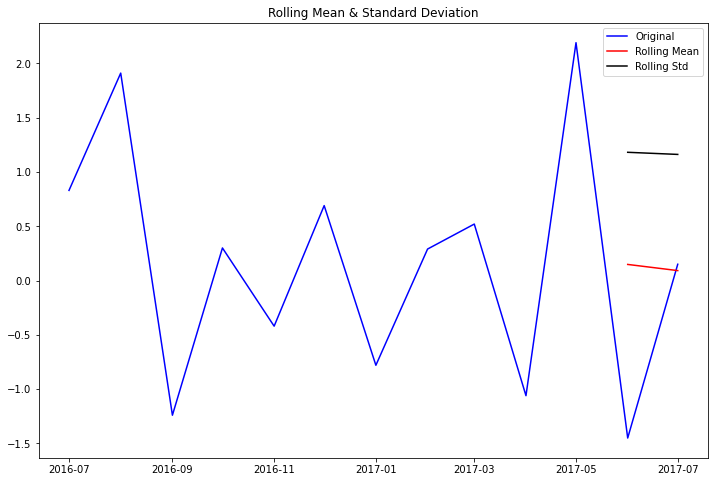

Results of Dickey-Fuller Test:
Test Statistic                 -5.030247
p-value                         0.000019
#Lags Used                      1.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [38]:
df_loan['seasonal_first_difference'] = df_loan.first_difference - df_loan.first_difference.shift(6) 
test_stationarity(df_loan.seasonal_first_difference.dropna(inplace=False))

In [39]:
mod = sm.tsa.statespace.SARIMAX(df_loan.Value, trend='n', order=(0,1,0), seasonal_order=(0,1,1,2))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Value   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 2)   Log Likelihood                 -22.354
Date:                           Wed, 20 Oct 2021   AIC                             48.708
Time:                                   00:58:03   BIC                             50.375
Sample:                               12-01-2015   HQIC                            48.874
                                    - 07-01-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L2       -0.9949     17.304     -0.057      0.954     -34.910      32.920
sigma2         0.6266     10.753      0.058

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**Plotting the Graph and Showing the next 3 months prediction**

In [40]:
start = datetime.datetime.strptime("2017-08-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,3)]
future = pd.DataFrame(index=date_list, columns= df_loan.columns)
df_loan = pd.concat([df_loan, future])

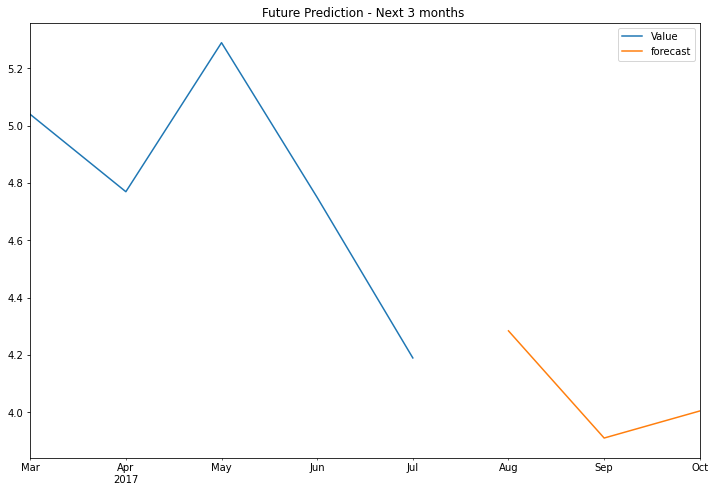

In [41]:
df_loan['forecast'] = results.predict(start =20, end = 22, dynamic= True) 
df_loan[['Value', 'forecast']].iloc[-8:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')
plt.title("Future Prediction - Next 3 months ")
plt.show()

**Showing the Predicted Values**

In [42]:
df_loan['forecast']

2015-12-01         NaN
2016-01-01         NaN
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01         NaN
2016-07-01         NaN
2016-08-01         NaN
2016-09-01         NaN
2016-10-01         NaN
2016-11-01         NaN
2016-12-01         NaN
2017-01-01         NaN
2017-02-01         NaN
2017-03-01         NaN
2017-04-01         NaN
2017-05-01         NaN
2017-06-01         NaN
2017-07-01         NaN
2017-08-01    4.284440
2017-09-01    3.910474
2017-10-01    4.004914
Name: forecast, dtype: float64

#Loans Account Balance

In [43]:
path = "Data"
df_balance = pd.read_csv(path+"/Loans Account.csv",index_col =0)
df_balance.index.name=None
df_balance.reset_index(inplace=True)
df_balance.drop(df_balance.index[175], inplace=False)
df_balance.head(10)

,index,Value
0,12/1/2002,516.10
1,1/1/2003,516.10
2,2/1/2003,516.10
3,3/1/2003,613.60
4,4/1/2003,613.60
5,5/1/2003,613.60
6,6/1/2003,724.68
7,7/1/2003,724.68
8,8/1/2003,724.68
9,9/1/2003,768.16


In [44]:
start = datetime.datetime.strptime("12/1/2002", "%m/%d/%Y")
date_list = [start + relativedelta(months=x) for x in range(0,176)]
df_balance['index'] =date_list
df_balance.set_index(['index'], inplace=True)
df_balance.index.name=None
df_balance

,Value
2002-12-01,516.10
2003-01-01,516.10
2003-02-01,516.10
2003-03-01,613.60
2003-04-01,613.60
...,...
2017-03-01,1583.59
2017-04-01,2233.30
2017-05-01,2504.13
2017-06-01,2842.17


,Value
2002-12-01,516.10
2003-01-01,516.10
2003-02-01,516.10
2003-03-01,613.60
2003-04-01,613.60
...,...
2017-03-01,1583.59
2017-04-01,2233.30
2017-05-01,2504.13
2017-06-01,2842.17


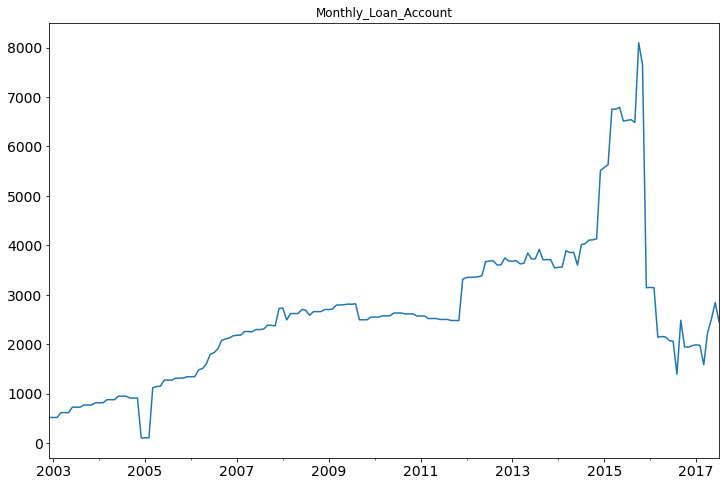

In [45]:
df_balance.Value.plot(figsize=(12,8), title= 'Monthly_Loan_Account', fontsize=14)
plt.savefig('monthly_Loan_Account.png', bbox_inches='tight')
df_balance


**Showing the Observed, Trend, Seasonal and Residual for the data**

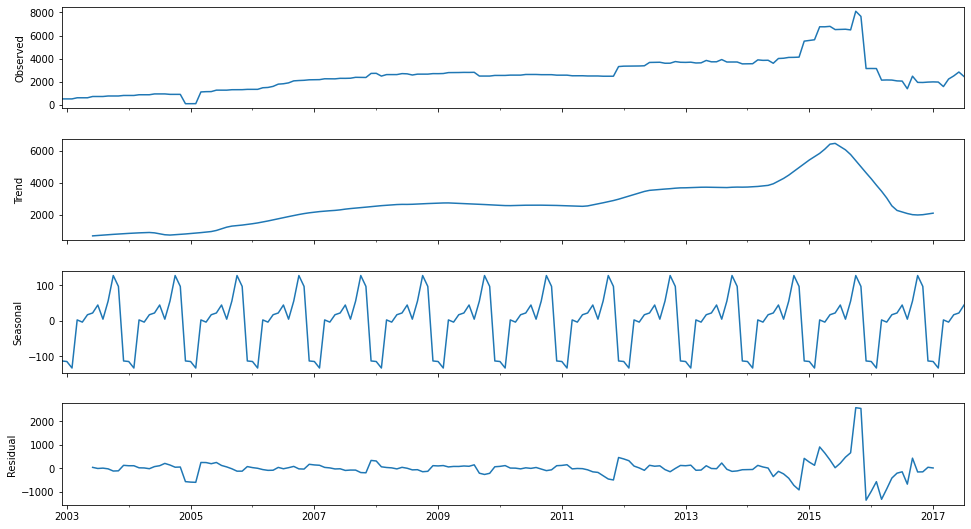

<Figure size 432x288 with 0 Axes>

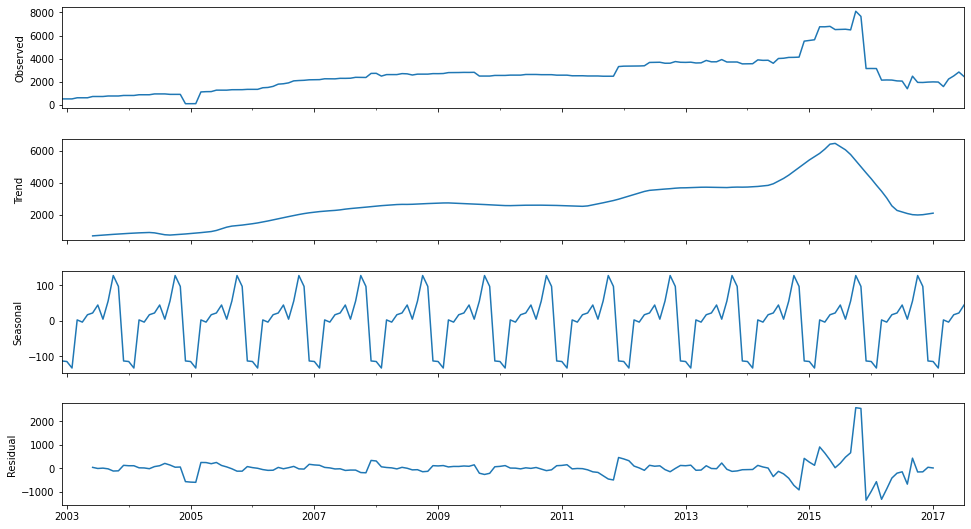

In [46]:
decomposition = seasonal_decompose(df_balance.Value, freq=12) 
fig = plt.figure() 
fig = decomposition.plot() 
fig.set_size_inches(15, 8)
fig

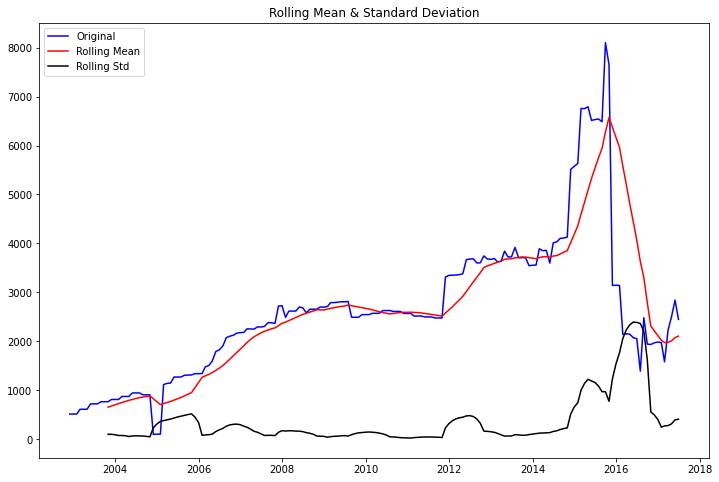

Results of Dickey-Fuller Test:
Test Statistic                  -2.175452
p-value                          0.215275
#Lags Used                       9.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [47]:
test_stationarity(df_balance.Value)

From the above we see the following: 
1. The Rolling mean/moving average has a trend for the years from 2004 -2015. After 2015 - 2016 there is huge increase in the value and lastly for the remaing years there is huge decrese in the value.
2. In the case of rolling STD there are small bumps weher the value tends to increase. But from year 2015 the value is there is huge increase in the vake and then a huge decrese in the value and then the value remains quite stationary
again.


**Applying Log for the Data**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


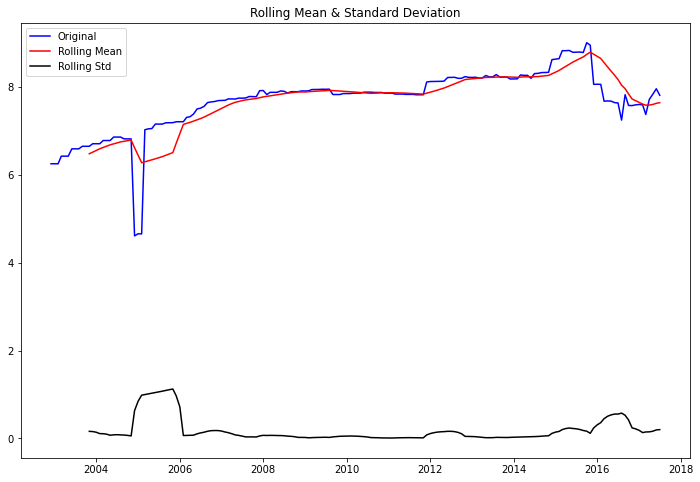

Results of Dickey-Fuller Test:
Test Statistic                  -2.096571
p-value                          0.245896
#Lags Used                       6.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (5%)             -2.878799
Critical Value (10%)            -2.575971
dtype: float64


In [48]:
df_balance.Value_log= df_balance.Value.apply(lambda x: np.log(x)) 
test_stationarity(df_balance.Value_log)

From the above we see the following: 
1. The original data it more seasonal and some places like for the year 2016 has a lot of nosie compared to the other years.
2. Both the Rolling mean and the STD start at 0.
3. The rolling mean value is Statiinary till the year 2012, after which is gradualty starts to increase till year 2015. Also we see that year 2015 - 2017 value is decrease butincrese again in the final years.
4. For the rolling STD we see that in the years 2005 - 227 there is ins an increse , stationary value then an decrese in the value , for the other years till 2013 the values are quite close to zero. After 2013 the value of STD tends to increse dramatically til year 2015.


**Showing the difference between the original Data and then shifting Data by 1**

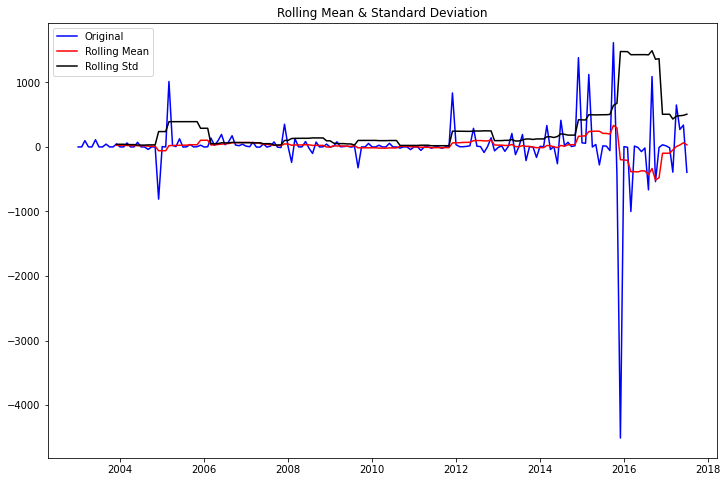

Results of Dickey-Fuller Test:
Test Statistic                  -4.605002
p-value                          0.000126
#Lags Used                       8.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [49]:
df_balance['first_difference'] = df_balance.Value - df_balance.Value.shift(1) 
test_stationarity(df_balance.first_difference.dropna(inplace=False))


From the above we see the following: 
1. For the rolling mean we see the value is staionary till the year 2013, after that year th tends to increse gradually till 2016.
2. further more we can see and drop in the value and then and increse the value for the last few years.
3. For the Rolling STD in the first few years the value tends to decrese , remaims staionary for the years 2007 -20011.
4. After that we see a trend in the graph , which shows the values to increase.

**Showing the Seasonal First Difference**

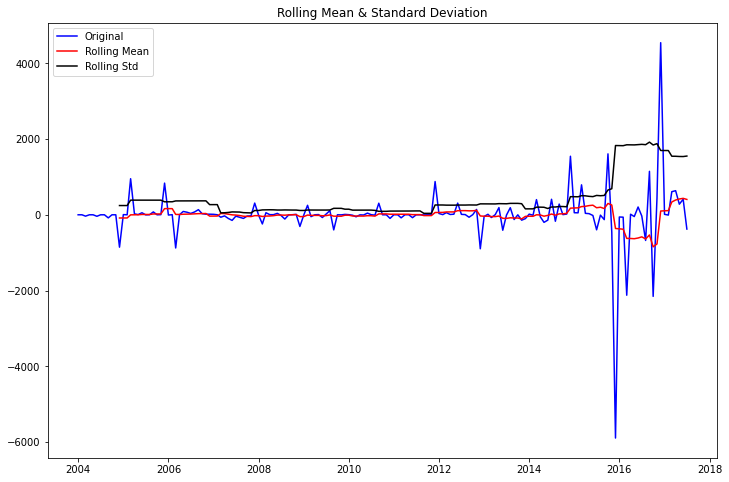

Results of Dickey-Fuller Test:
Test Statistic                -7.765418e+00
p-value                        9.215962e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.510000e+02
Critical Value (1%)           -3.474416e+00
Critical Value (5%)           -2.880878e+00
Critical Value (10%)          -2.577081e+00
dtype: float64


In [50]:
df_balance['seasonal_first_difference'] = df_balance.first_difference - df_balance.first_difference.shift(12) 
test_stationarity(df_balance.seasonal_first_difference.dropna(inplace=False))

In [51]:
mod = sm.tsa.statespace.SARIMAX(df_balance.Value, trend='n', order=(0,1,0), seasonal_order=(0,1,1,8))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Value   No. Observations:                  176
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 8)   Log Likelihood               -1265.704
Date:                           Wed, 20 Oct 2021   AIC                           2535.408
Time:                                   00:58:06   BIC                           2541.644
Sample:                               12-01-2002   HQIC                          2537.939
                                    - 07-01-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L8       -0.8997      0.046    -19.523      0.000      -0.990      -0.809
sigma2      2.097e+05   4310.706     48.637

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


**Plotting the Graph and showing next 3 months prediction**

In [52]:
start = datetime.datetime.strptime("2017-08-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,3)]
future = pd.DataFrame(index=date_list, columns= df_balance.columns)
df_balance = pd.concat([df_balance, future])


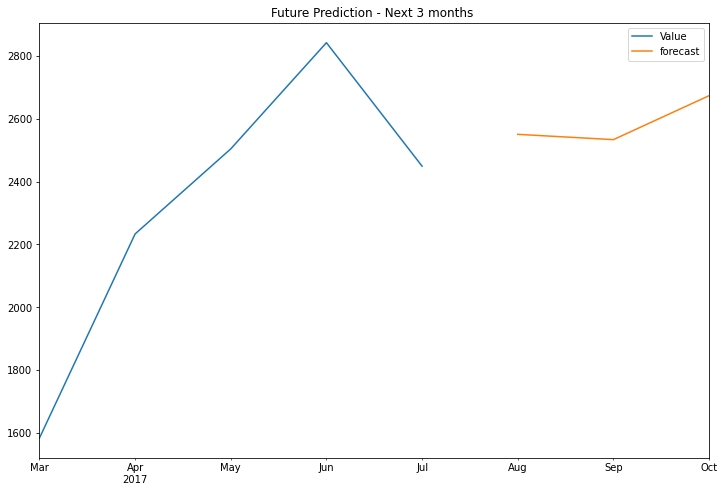

In [53]:
df_balance['forecast'] = results.predict(start =176, end = 178, dynamic= True) 
df_balance[['Value', 'forecast']].iloc[-8:].plot(figsize=(12, 8)) 
plt.savefig('ts_predict_future.png', bbox_inches='tight')
plt.title("Future Prediction - Next 3 months ")
plt.show()

**shwoing the predicted values**

In [54]:
df_balance['forecast']

2002-12-01            NaN
2003-01-01            NaN
2003-02-01            NaN
2003-03-01            NaN
2003-04-01            NaN
                 ...     
2017-06-01            NaN
2017-07-01            NaN
2017-08-01    2550.396813
2017-09-01    2533.533169
2017-10-01    2673.410624
Name: forecast, Length: 179, dtype: float64